## Prueba de  Modelos supervisados
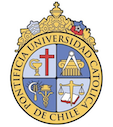

#### Pontificia Universidad Católica de Chile
Diplomado en Data Science

Septiembre 2021


### Nombre:
Pablo Opazo 
Mario Guajardo


Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (`2009_1perc.csv` y `2010_1perc.csv`) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.

- La variable respuesta 'arstmade' informa si los procedimientos policiales han terminado en arresto o no, y el objetivo será realizar un modelo de Machine Learning para predecir si un futuro procedimiento terminará en arresto.

# 1.- Enliste todas las librerias que utilizará (0.5 puntos)
Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba

In [ ]:
import pandas as pd 
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import OneHotEncoder

# 2.- Importación y revisión de los datos (1 punto)

Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración *básica* de los datos (numero de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [ ]:
df1 = pd.read_csv("2009_1perc.csv")
df2 = pd.read_csv("2010_1perc.csv")
df1.head()

In [ ]:
df_consolidado = df1.append(df2)
df_consolidado

# 3.- Preprocesamiento de datos (1 punto)
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:

- 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

In [ ]:
df_categorical = pd.DataFrame({},columns= lista)

for column in df_consolidado.select_dtypes(include='object'):
    if df_consolidado[column].nunique() >=2 and df_consolidado[column].nunique() <= 99:
        df_categorical[column] = df_consolidado[column].astype('category')

df_categorical.drop(columns=['forceuse','adtlrept','machgun'], inplace = True)


In [ ]:
# gráficos para ver datos vacíos
msno.bar(df_categorical)

- 3.2 Reemplaze las siguientes clases faltantes:

  -Si alguna categoría de las columnas officrid,  o offverb es igual a "" cambielo a 'N' y en caso contrario dejelo como 'Y'
  
  -Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso contrario mantenga su valor
  
Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [156]:
df_categorical['officrid'] = df_categorical['officrid'].str.replace(' ','N', regex = True)
df_categorical['offshld'] = df_categorical['offshld'].str.replace(' ','N', regex = True)
df_categorical['offverb'] = df_categorical['offverb'].str.replace(' ','N', regex = True)

df_categorical['beat'] = df_categorical['beat'].str.replace(' ','U', regex = True)
df_categorical['beat']

0        7
1        U
2        U
3        4
4        U
        ..
6008     U
6009     U
6010     U
6011     U
6012    11
Name: beat, Length: 11825, dtype: object

- 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [157]:
def transform(feet, inch):
    return (feet *  0.3048 + inch *0.0254)

df_consolidado['meters'] = df_consolidado.apply(lambda x : transform( x['ht_feet'], x['ht_inch']), axis=1)
df_consolidado['meters']

0       1.7526
1       1.6510
2       1.9050
3       1.6510
4       1.6764
         ...  
6008    1.7780
6009    1.7018
6010    1.8288
6011    1.8034
6012    1.8542
Name: meters, Length: 11825, dtype: float64

- 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.

Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/ 

In [158]:
df_consolidado['fecha'] = pd.to_datetime(df_consolidado['datestop'], format= '%m%d%Y')
df_consolidado['month'] = pd.DatetimeIndex(df_consolidado['fecha']).month
df_consolidado['month'].head()

0     4
1    10
2    10
3    12
4    12
Name: month, dtype: int64

 - 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [159]:
df_final = df_categorical
df_final['month'] = df_consolidado['month']
df_final['year'] = df_consolidado['year']
df_final['age'] = df_consolidado['age']
df_final['meters'] = df_consolidado['meters']

# 4.- Análisis exploratorio (1 punto)

- 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

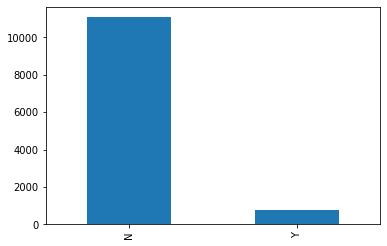

In [160]:
df_final['arstmade'].value_counts().plot(kind = 'bar')

RESPUESTA: Podemos ver que la variable está "cargada" hacia el evento negativo por lo que podemos deducir que en la mayor cantidad de los datos controlados no se realizó un arresto 

- 4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

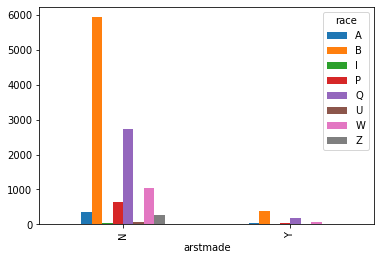

In [199]:
df_arstmade_race = pd.DataFrame()
df_arstmade_race = df_final[['arstmade','race']].copy()
pd.crosstab(df_arstmade_race['arstmade'], df_arstmade_race['race']).plot.bar()

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

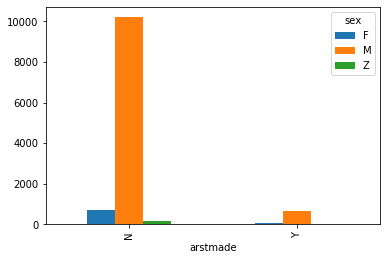

In [198]:
df_arstmade_sex = pd.DataFrame()
df_arstmade_sex = df_final[['arstmade','sex']].copy()
pd.crosstab(df_arstmade_sex['arstmade'], df_arstmade_sex['sex']).plot.bar()

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.

In [204]:
pd.crosstab([df_final['sex'],df_final['race']],df_final['arstmade'])

ValueError: values cannot be used without an aggfunc.

- 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

In [170]:
df_final['coded_arstmade'] = df_final['arstmade'].apply(lambda x : 1 if x == 'Y' else 0)
df_final['coded_arstmade'] 

0       0
1       0
2       0
3       0
4       0
       ..
6008    0
6009    0
6010    0
6011    0
6012    0
Name: coded_arstmade, Length: 11825, dtype: category
Categories (2, int64): [0, 1]

- 4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

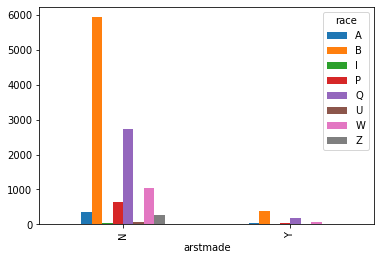

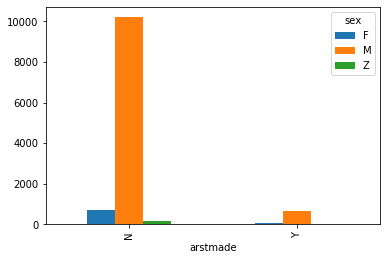

# 5.- Determinar si el procedimiento policial concluirá en alguna acción violenta. (0.5 puntos)

Los atributos que tienen el prefijo pf (`['pf_hands'],['pf_wall'], ['pf_grnd'], ['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']`) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'. 

Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

In [179]:
df_final['pf_hands']

0       N
1       N
2       N
3       N
4       N
       ..
6008    Y
6009    N
6010    N
6011    Y
6012    N
Name: pf_hands, Length: 11825, dtype: category
Categories (2, object): [N, Y]

# 6.- Modelación (2 puntos)

- 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test  utilizando el año 2009 para entrenar, y el año 2010 para testear. (0.5 pts)

- 6.2  Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno). (1.5 pts)

# Bonus (0.5 pts)

¿Que puede hacer para mejorar la predicción de los modelos?